In [ ]:
!pip install brian2

     |████████████████████████████████| 1.2MB 6.4MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp37-cp37m-linux_x86_64.whl size=1257154 sha256=6548f395ba3063f4217fc937bcc0d4df99221e3c239368e21747da8601fde830
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2


In [ ]:
import random 
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt

# **Question 1**

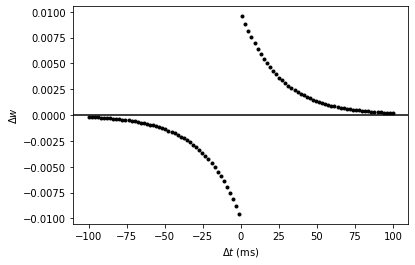

In [ ]:
taupre      = taupost = 25*ms
Apre        = 0.01
Apost       = -0.01
tmax        = 100*ms
N           = 100

pre         = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=200*ms)
post        = NeuronGroup(N, 'tspike:second', threshold='t>tspike', refractory=200*ms)
pre.tspike  = 'i*tmax/(N-1)'
post.tspike = '(N-1-i)*tmax/(N-1)'

S = Synapses(pre, post,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',

             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(j='i')

run(tmax+1*ms)

plot((post.tspike-pre.tspike)/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')

# **Question 2**

In [ ]:
inp   = 10
out   = 2

## **without pattern array**

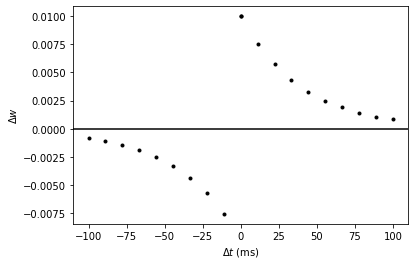

In [ ]:
taupre      = taupost = 40*ms
Apre        = 0.01
Apost       = -0.01
tmax        = 100*ms


pre         = NeuronGroup(inp, 'tspike:second', threshold='t>tspike', refractory=200*ms)
post        = NeuronGroup(out, 'tspike:second', threshold='t>tspike', refractory=200*ms)
pre.tspike  = 'i*tmax/(inp-1)'
post.tspike = '(out-1-i)*tmax/(out-1)'

S = Synapses(pre, post,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',

             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(i=np.arange(10),j=0)
S.connect(i=np.arange(10),j=1)
run(tmax+1*ms)

spikes = []
for a in range (2):
  for b in range (10):
    spikes.append(post.tspike[a] - pre.tspike[b])
plot((spikes)/ms, S.w, '.k')
xlabel(r'$\Delta t$ (ms)')
ylabel(r'$\Delta w$')
axhline(0, ls='-', c='k')

## **with pattern array**

In [ ]:
v_rest = -70 * mV
v_reset = -65 * mV
firing_threshold = -50 * mV
membrane_time_scale = 8.  * ms

taupre = taupost = 80*ms
Apre = 0.01
Apost = -0.01

eqs = """
    dv/dt = (-(v-v_rest))/ membrane_time_scale : volt
    firing_threshold : volt
    v_reset : volt
    """

In [ ]:
indices = array([0,1,2,3,4,5,6,7,8,9])
times = array([1,2,3,4,5,6,7,8,9,10])*ms

In [ ]:
input_layer     = SpikeGeneratorGroup(inp, indices, times)
output_layer    = NeuronGroup(out,  eqs, threshold='v>=firing_threshold', reset='v=v_reset', method='euler')
output_layer.firing_threshold = firing_threshold
output_layer.v_reset = v_reset

syn = Synapses(input_layer, output_layer, '''
            w : 1
            dapre/dt  = -apre /taupre  : 1 (event-driven)
            dapost/dt = -apost/taupost : 1 (event-driven)
            ''',
            on_pre='''
            v_post += 5*w*mV
            apre += Apre
            w = w+apost
            ''',
            on_post='''             
            apost += Apost
            w = w+apre
            ''')
syn.connect(p=1)
#syn.w = [rand() for i in range(20)]
syn.w=[0.9 for i in range(20)]
synapse_mon = StateMonitor(syn, ['w', 'apost', 'apre', 'v_post'] , record=True)
out_mon = StateMonitor(output_layer, 'v', record=True)
out_spike_mon = SpikeMonitor(output_layer)
in_spike_mon = SpikeMonitor(input_layer)

run(times[-1])

Text(0.5, 1.0, 'weights of neuron 1')

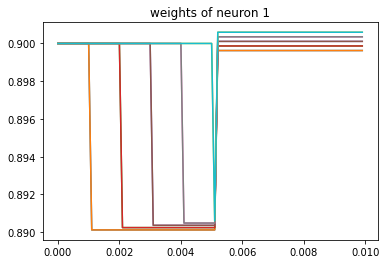

In [ ]:
for i in range(10):
    plot(synapse_mon.t, synapse_mon.w[i].T)
plt.title("weights of neuron 1")

Text(0.5, 1.0, 'weights of neuron 2')

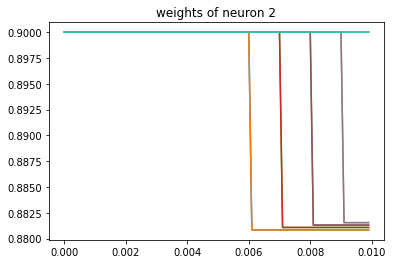

In [ ]:
for i in range(10,20):
    plot(synapse_mon.t, synapse_mon.w[i].T)
plt.title("weights of neuron 2")

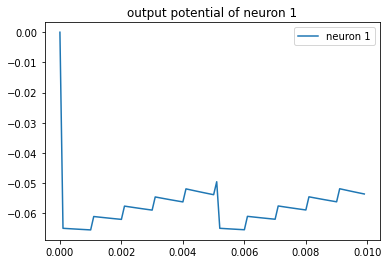

In [ ]:
plot(out_mon.t, out_mon.v[0].T, label='neuron 1')
plt.title("output potential of neuron 1")
legend()

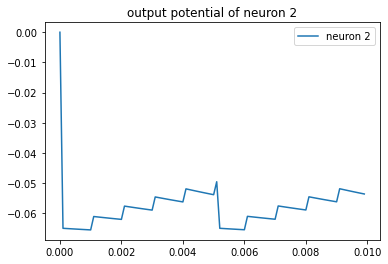

In [ ]:
plot(out_mon.t, out_mon.v[1].T, label='neuron 2')
plt.title("output potential of neuron 2")
legend()

Text(0.5, 1.0, 'output layer spikes')

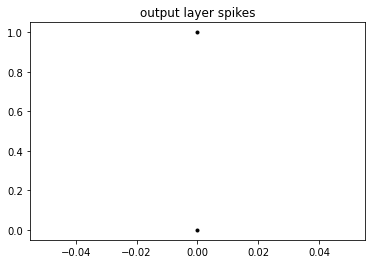

In [ ]:
plot(out_spike_mon.t, out_spike_mon.i, '.k')
plt.title("output layer spikes")

Text(0.5, 1.0, 'input layer spikes')

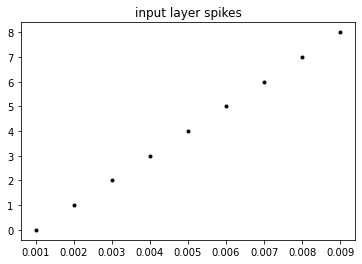

In [ ]:
plot(in_spike_mon.t, in_spike_mon.i, '.k')
plt.title("input layer spikes")